In [11]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests
import numpy as np
import matplotlib.pyplot as plt


In [2]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten")

def recognize_text_from_image(image_path):
    image = Image.open(image_path).convert("RGB")
    
    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    
    return generated_text

c:\Users\joana\.conda\envs\cv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
image_path = "C:/Users/joana/OneDrive/Desktop/HSLU/3rd_semester/CV/c_vision_ocr/data/img_one.png"
recognized_text = recognize_text_from_image(image_path)
print("Recognized Text:", recognized_text)

Recognized Text: 9th.


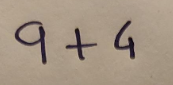

In [9]:
image = Image.open(image_path).convert('RGB')
image

In [4]:
try:
    result = eval(recognized_text)
    print(f"{recognized_text} = {result}")
except Exception as e:
    print(f"Error evaluating expression: {e}")

5-41. = -36.0


In [10]:
image_paths = ["C:/Users/joana/OneDrive/Desktop/HSLU/3rd_semester/CV/c_vision_ocr/data/img_one.png", "C:/Users/joana/OneDrive/Desktop/HSLU/3rd_semester/CV/c_vision_ocr/data/img_two.png", "C:/Users/joana/OneDrive/Desktop/HSLU/3rd_semester/CV/c_vision_ocr/data/img_three.png"]

In [12]:
images = np.array(image_paths)

In [13]:
def visualize_df(df: np.ndarray):
    fig, axes = plt.subplots(2, 2, figsize=(6, 6))
    np.random.shuffle(df)
    for i, ax in enumerate(axes.ravel()):
        if i < len(df):
            img_path = df[i]
            image = Image.open(img_path).convert('RGB')
            inputs = processor(image, return_tensors="pt").pixel_values
            generated_ids = model.generate(inputs)
            generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
            ax.imshow(image)
            ax.set_title(generated_text)
            ax.axis('off')
            
        else:
            ax.axis('off')
            
    plt.tight_layout()
    plt.show()

: 

In [ ]:
visualize_df(images)